In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
sys.path.append('..')

import os

from tqdm.autonotebook import tqdm
tqdm.pandas()

%matplotlib inline  
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

/var/folders/73/1_fd1jr14477j2fv2b70mpx00000gn/T/ipykernel_24842/628072840.py:7: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
from kst.data_sets.TextDocument import TextDocument
from kst.data_sets.TextCorpus import TextCorpus

In [4]:
from gensim.parsing.preprocessing import (
    strip_tags,
    strip_punctuation,
    strip_multiple_whitespaces,
    remove_stopwords,
    strip_short,
    strip_numeric,
    stem_text
)

In [5]:
GENSIM_CUSTOM_TEKENIZER = [
            lambda x: x.lower(),
            strip_tags,
            strip_punctuation,
            strip_multiple_whitespaces,
            remove_stopwords,
            strip_numeric,
            lambda x: strip_short(x, minsize=2),
        ]

# Training data

In [6]:
tc = TextCorpus(corpus_description='ac imdb train corpus', gensim_custom_tokenizer=GENSIM_CUSTOM_TEKENIZER)

In [7]:
docs_path = "/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/train/neg"
for file in tqdm(os.listdir(docs_path)):
    if file.endswith("txt"):
        tc.add_document(TextDocument(os.path.join(docs_path,file), 0))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12501/12501 [00:16<00:00, 774.97it/s]


In [8]:
docs_path = "/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/train/pos"
for file in tqdm(os.listdir(docs_path)):
    if file.endswith("txt"):
        tc.add_document(TextDocument(os.path.join(docs_path,file), 1))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [00:18<00:00, 692.50it/s]


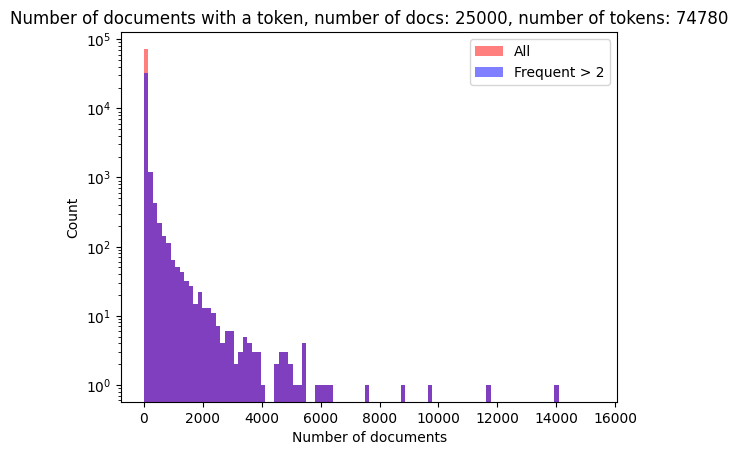

In [9]:
bin_size = int(max(list(tc.token_doc_count.values()))/100)
my_bins = range(0,max(list(tc.token_doc_count.values())),bin_size)
plt.hist([i for i in list(tc.token_doc_count.values()) if (i > 0)], bins = my_bins, color = 'red', alpha = 0.5, label = 'All')
plt.hist([i for i in list(tc.token_doc_count.values()) if (i > 2)], bins = my_bins, color = 'blue', alpha = 0.5, label = 'Frequent > 2')
plt.yscale("log")
plt.title(f"""Number of documents with a token, number of docs: {tc.docs_count}, number of tokens: {tc.tokens_count}""")
plt.xlabel("Number of documents")
plt.ylabel("Count")
plt.legend(loc="upper right")

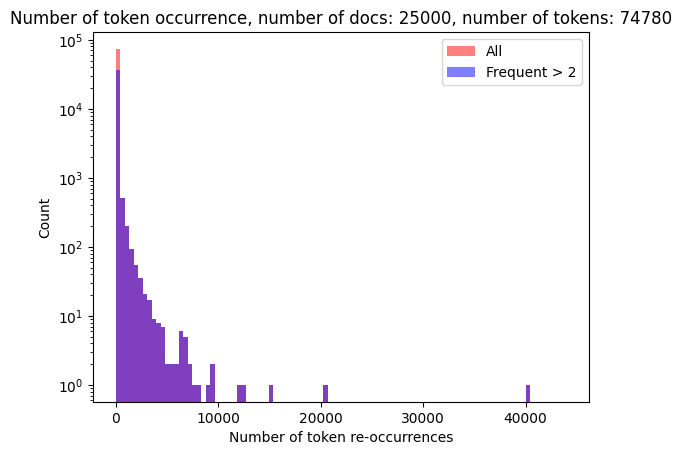

In [10]:
bin_size = int(max(list(tc.token_absolute_count.values()))/100)
my_bins = range(0,max(list(tc.token_absolute_count.values())),bin_size)
plt.hist([i for i in list(tc.token_absolute_count.values()) if (i > 0)], bins = my_bins, color = 'red', alpha = 0.5, label = 'All')
plt.hist([i for i in list(tc.token_absolute_count.values()) if (i > 2)], bins = my_bins, color = 'blue', alpha = 0.5, label = 'Frequent > 2')
plt.yscale("log")
plt.title(f"""Number of token occurrence, number of docs: {tc.docs_count}, number of tokens: {tc.tokens_count}""")
plt.xlabel("Number of token re-occurrences")
plt.ylabel("Count")
plt.legend(loc="upper right")

In [11]:
tc.tokens_count

74780

In [12]:
len(tc.get_frequent_tokens(2,2))

43970

In [13]:
len(tc.get_rare_tokens(1,1))

28647

In [14]:
len(tc.get_frequent_tokens(2,2))+len(tc.get_rare_tokens(1,1))

72617

In [15]:
tc.get_rare_tokens(1,1)[:10]

['dodds',
 'kirkendalls',
 'roadtrip',
 'despirately',
 'hightailing',
 'vancamp',
 'shingles',
 'shipka',
 'ruptures',
 'tensionthe']

In [16]:
tc.get_frequent_tokens(8000, 4000)

['film',
 'good',
 'movie',
 'bad',
 'people',
 'way',
 'like',
 'time',
 'story',
 'great']

In [17]:
too_rare = tc.get_rare_tokens(2,2)
too_frequent = tc.get_frequent_tokens(8000, 4000)

tokens_to_exclude =  too_rare + too_frequent

In [18]:
corpus, token2index, index2token = tc.get_corpus(tokens_to_exclude)

Getting corpus: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 25932.51it/s]


In [19]:
labels = tc.labels

In [20]:
corpus_df = pd.DataFrame.from_dict({'corpus':corpus, 'labels':labels})

In [21]:
corpus_df['token_indexes'] = corpus_df.corpus.map(lambda x: [token2index.get(i) for i in x if i in token2index.keys()])
corpus_df['n_tokens'] = corpus_df.token_indexes.map(lambda x: len(x))

In [22]:
corpus_df

,corpus,labels,token_indexes,n_tokens
0,"[working, best, shakespeare, sources, manages,...",0,"[36569, 2951, 29377, 30728, 20030, 7341, 30726...",18
1,"[tremors, original, started, enjoyable, watch,...",0,"[33939, 23176, 31291, 10714, 35922, 25496, 339...",65
2,"[ouch, bit, painful, sit, cute, amusing, premi...",0,"[23246, 3149, 23548, 29995, 7700, 1033, 25279,...",48
3,"[ve, seen, crappy, movies, life, worst, defina...",0,"[35234, 29059, 7275, 21709, 19088, 36606, 8216...",141
4,"[carriers, follows, exploits, guys, gals, stol...",0,"[4822, 12534, 11409, 14424, 13178, 31519, 2080...",366
...,...,...,...,...
24995,"[year, ago, finally, gave, american, televisio...",1,"[36794, 586, 12129, 13308, 967, 32871, 33202, ...",64
24996,"[saw, elaborate, dvd, box, dreadful, red, quee...",1,"[28592, 10311, 10026, 3765, 9732, 26698, 26059...",60
24997,"[november, chance, reno, festival, lot, fun, t...",1,"[22616, 5170, 27105, 11993, 19496, 13031, 3280...",58
24998,"[loved, editing, use, soundtrack, captures, re...",1,"[19535, 10204, 35056, 30721, 4711, 26497, 1189...",44


# Test data

In [23]:
tc_test = TextCorpus(corpus_description='ac imdb test corpus', gensim_custom_tokenizer=GENSIM_CUSTOM_TEKENIZER)

In [24]:
docs_path = "/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/test/neg"
for file in tqdm(os.listdir(docs_path)):
    if file.endswith("txt"):
        tc_test.add_document(TextDocument(os.path.join(docs_path,file), 0))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [00:15<00:00, 800.12it/s]


In [25]:
docs_path = "/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/test/pos"
for file in tqdm(os.listdir(docs_path)):
    if file.endswith("txt"):
        tc_test.add_document(TextDocument(os.path.join(docs_path,file), 1))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [00:14<00:00, 835.64it/s]


In [26]:
corpus_test, token2index_test, index2token_test = tc_test.get_corpus(tokens_to_exclude)

Getting corpus: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 36045.64it/s]


In [27]:
labels_test = tc_test.labels

In [28]:
corpus_test_df = pd.DataFrame.from_dict({'corpus':corpus_test, 'labels':labels_test})

In [29]:
corpus_test_df['token_indexes'] = corpus_test_df.corpus.map(lambda x: [token2index.get(i) for i in x if i in token2index.keys()])
corpus_test_df['n_tokens'] = corpus_test_df.token_indexes.map(lambda x: len(x))

In [30]:
corpus_test_df

,corpus,labels,token_indexes,n_tokens
0,"[alan, rickman, emma, thompson, performances, ...",0,"[707, 27627, 10522, 33186, 24170, 30735, 22297...",42
1,"[seen, care, think, going, paris, country, nat...",0,"[29059, 4732, 33160, 13786, 23742, 7146, 22079...",42
2,"[los, angeles, alcoholic, lazy, hank, chinaski...",0,"[19485, 1122, 740, 18780, 14672, 20443, 8888, ...",77
3,"[fumavano, le, colt, lo, chiamavano, camposant...",0,"[18785, 6166, 19312, 12113, 18833, 19496, 8566...",196
4,"[comment, films, utter, rubbish, aim, help, wa...",0,"[6249, 12113, 35088, 28111, 634, 15098, 35826,...",69
...,...,...,...,...
24995,"[certainly, constructed, beginning, ending, da...",1,"[5106, 6742, 2745, 10638, 7897, 12496, 19141, ...",142
24996,"[nice, comedy, grown, ups, masterfully, struct...",1,"[22339, 6205, 14252, 35004, 20368, 31733, 11, ...",111
24997,"[jean, renoir, homage, paris, late, th, centur...",1,"[17485, 27106, 15493, 23742, 18688, 33052, 509...",374
24998,"[movies, mean, movies, shootings, killings, li...",1,"[21709, 20604, 21709, 29638, 18151, 19088, 315...",42


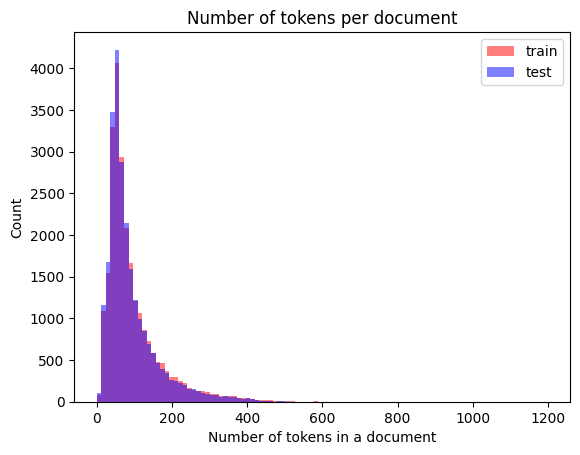

In [31]:
bin_size = int(max(list(corpus_df.n_tokens.values) + list(corpus_test_df.n_tokens.values))/100)
my_bins = range(0,max(list(corpus_df.n_tokens.values) + list(corpus_test_df.n_tokens.values)),bin_size)
plt.hist(corpus_df.n_tokens, bins = my_bins, color = 'red', alpha = 0.5, label='train')
plt.hist(corpus_test_df.n_tokens, bins = my_bins, color = 'blue', alpha = 0.5, label='test')
# plt.yscale("log")
plt.title(f"""Number of tokens per document""")
plt.xlabel("Number of tokens in a document")
plt.ylabel("Count")
plt.legend(loc="upper right")

# Store tokens

In [32]:
corpus_df.sample(frac = 1.0).to_pickle('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/corpus_train_df.pkl')

In [33]:
corpus_test_df.sample(frac = 1.0).to_pickle('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/corpus_test_df.pkl')